In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from pathlib import Path

samples_folder = Path('../../samples')

In [2]:
# This notebook inspect the samples I generated for the 1000 events with 50 pileup IVF

In [3]:
import uproot
import mplhep as hep
import awkward as ak
import hist
from matplotlib import pyplot as plt
import numpy as np
import pandas 

In [4]:
file_path = samples_folder / "sample/n1000_npu50_IVF/vertex_n1000_npu50_IVF.root"


In [5]:
file = uproot.open(file_path)

In [6]:
file.keys()

['ML_tracks;2', 'ML_tracks;1', 'vertexing;1']

In [7]:
file['ML_tracks'].keys()

['event_nr',
 'reco_PriVtxX',
 'reco_PriVtxY',
 'reco_PriVtxZ',
 'truth_PriVtxX',
 'truth_PriVtxY',
 'truth_PriVtxZ',
 'reco_trk_fit_d0',
 'reco_trk_fit_z0',
 'reco_trk_fit_phi',
 'reco_trk_fit_theta',
 'reco_trk_fit_qop',
 'reco_trk_fit_time',
 'reco_trk_fit_err_d0',
 'reco_trk_fit_err_z0',
 'reco_trk_fit_err_phi',
 'reco_trk_fit_err_theta',
 'reco_trk_fit_err_qop',
 'reco_trk_fit_err_time',
 'reco_trk_truth_vtx_idx',
 'reco_trk_reco_vtx_idx']

In [8]:
ML_tracks = file['ML_tracks'].arrays()

In [9]:
vertexing = file['vertexing'].arrays()

In [10]:
ak.count(ML_tracks.event_nr)

1000

In [11]:
ak.count(ML_tracks.truth_PriVtxZ)

51097

In [12]:
np.all(ak.count(ML_tracks.truth_PriVtxZ, axis=1) == 50 ) 

False

In [13]:
np.mean(ak.count(ML_tracks.truth_PriVtxZ, axis=1))

51.097

# Truth Vertex distribution

## n truth vertex

In [24]:
hist_n_truth_PriVtx = hist.Hist(hist.axis.Regular(40, 30, 70, 
                                                 name="hist_n_truth_PriVtx", label="Number of Primary Vertex"))
hist_n_truth_PriVtx.fill(ak.count(ML_tracks.truth_PriVtxZ, axis=1))

Hist(Regular(40, 30, 70, name='hist_n_truth_PriVtx', label='Number of Primary Vertex'), storage=Double()) # Sum: 993.0 (1000.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8c8021e940>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

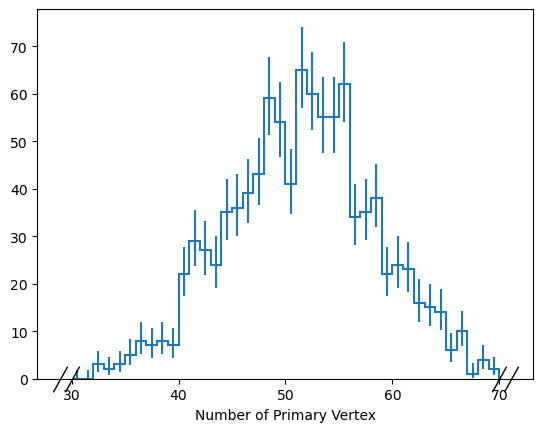

In [25]:
hep.histplot(hist_n_truth_PriVtx, density=False, histtype='step')

(FitResultArtists(line=<matplotlib.lines.Line2D object at 0x7f8c80108220>, errorbar=<ErrorbarContainer object of 3 artists>, band=<matplotlib.collections.PolyCollection object at 0x7f8c80108400>),
 PullArtists(bar=<BarContainer object of 40 artists>, patch_artist=[(<matplotlib.patches.Rectangle object at 0x7f8c801087c0>, <matplotlib.patches.Rectangle object at 0x7f8c80108370>), (<matplotlib.patches.Rectangle object at 0x7f8c80069700>, <matplotlib.patches.Rectangle object at 0x7f8c800694c0>), (<matplotlib.patches.Rectangle object at 0x7f8c80069ac0>, <matplotlib.patches.Rectangle object at 0x7f8c800698e0>), (<matplotlib.patches.Rectangle object at 0x7f8c80069e80>, <matplotlib.patches.Rectangle object at 0x7f8c80069ca0>), (<matplotlib.patches.Rectangle object at 0x7f8c8007a280>, <matplotlib.patches.Rectangle object at 0x7f8c80069f10>)]))

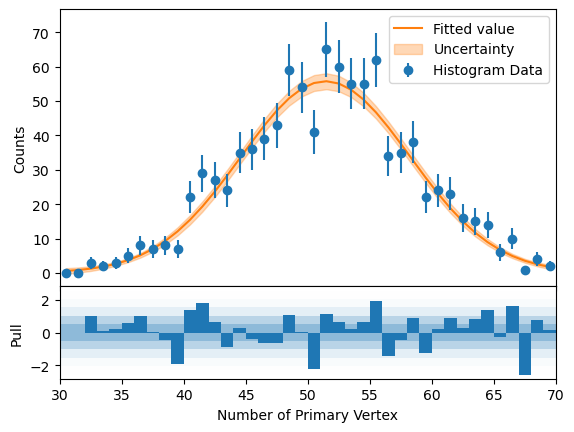

In [26]:
hist_n_truth_PriVtx.plot_pull(
    func = pdf
)

## truth vertex vz

In [19]:
hist_truth_PriVtxZ = hist.Hist(hist.axis.Regular(101, -200, 200, 
                                                 name="hist_truth_PriVtxZ", label="Truth Primary Vertex Z [mm]"))
hist_truth_PriVtxZ.fill(ak.flatten(ML_tracks['truth_PriVtxZ']))

Hist(Regular(101, -200, 200, name='hist_truth_PriVtxZ', label='Truth Primary Vertex Z [mm]'), storage=Double()) # Sum: 51079.0 (51097.0 with flow)

55.88730469023926


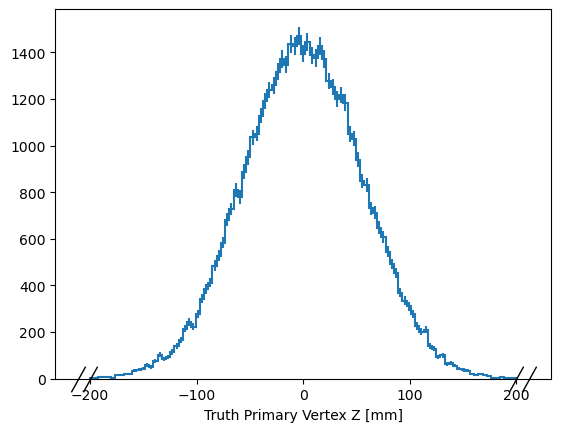

In [20]:
fig, axs = plt.subplots()
hep.histplot(hist_truth_PriVtxZ, density=False, histtype='step')
print(np.std(ak.flatten(ML_tracks['truth_PriVtxZ'])))

(FitResultArtists(line=<matplotlib.lines.Line2D object at 0x7f8c8cc151f0>, errorbar=<ErrorbarContainer object of 3 artists>, band=<matplotlib.collections.PolyCollection object at 0x7f8c8c9cde20>),
 PullArtists(bar=<BarContainer object of 101 artists>, patch_artist=[(<matplotlib.patches.Rectangle object at 0x7f8c8c9cdd00>, <matplotlib.patches.Rectangle object at 0x7f8c8c9cd250>), (<matplotlib.patches.Rectangle object at 0x7f8c8ccc7f40>, <matplotlib.patches.Rectangle object at 0x7f8c8cc172e0>), (<matplotlib.patches.Rectangle object at 0x7f8c8ccc7280>, <matplotlib.patches.Rectangle object at 0x7f8c8ccc75b0>), (<matplotlib.patches.Rectangle object at 0x7f8c8ccc7250>, <matplotlib.patches.Rectangle object at 0x7f8c8ccc7d00>), (<matplotlib.patches.Rectangle object at 0x7f8c8ccc7eb0>, <matplotlib.patches.Rectangle object at 0x7f8c8ccc77f0>)]))

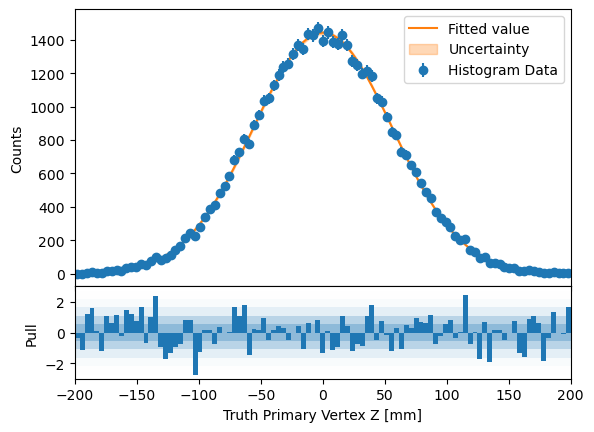

In [21]:
def pdf(x, a=1 / np.sqrt(2 * np.pi), x0=0, sigma=55, offset=0):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma**2)) + offset

hist_truth_PriVtxZ.plot_pull(
    func = pdf,
)

# n reco vtx vs n truth vtx